In [38]:
# Importing data wrangling libraries
import pandas as pd
import data_cleaning
# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [39]:
# Loading the mined data
moi_1 = pd.read_csv('data/20200215_152805_moi_tweets.csv')
moi_2 = pd.read_csv('data/20200214_160524_moi_tweets.csv')
moi_3 = pd.read_csv('data/20200214_214556_moi_tweets.csv')
moi_4 = pd.read_csv('data/20200215_004925_moi_tweets.csv')
moi_5 = pd.read_csv('data/20200215_110135_moi_tweets.csv')

# Concatenating the scraped tweets into one big dataset
moi = pd.concat([moi_1, moi_2, moi_3, moi_4, moi_5], axis=0)
moi.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,sheinnerstands,mute art,water,72,566,3826,2019-03-23 21:06:03,2020-02-06 23:59:32,0,"Some will psychoanalyse, call on deities and s...",[]
1,konicsid,#바비 : 𝐥𝐨𝐥 𝐝𝐚𝐭𝐬 𝐦𝐲 𝐛𝐞𝐥𝐨𝐯𝐞𝐝 𝐛𝐫𝐨𝐭𝐡𝐞𝐫,bobby love bot,332,858,58539,2018-08-01 10:36:31,2020-02-06 23:59:16,0,happy birthday moi lov 💕💞💓💗💝💘💖 @331adore https...,[]
2,cliffblack15,NaN,NaN,0,1,3357,2019-10-31 19:32:29,2020-02-06 23:59:16,0,MY UNDERSTN IS THAT TIM AND ARIA WRE BOTH IN O...,[]
3,Maurice_ireri,"Rockstar engineer,inventor,innovator &entrepre...",NaN,674,1173,3716,2012-02-01 17:24:43,2020-02-06 23:59:15,40,Moi's unexpected turn up for the murdered Robe...,[]
4,cest_moi_kayle,big cowboy DUMMY!!!,NaN,163,68,2337,2016-11-26 02:42:21,2020-02-06 23:58:50,4,listening to the love club by lorde on repeat ...,[]


In [40]:
print('Size of the dataset is ', moi.shape[0], 'observations')

Size of the dataset is  90000 observations


In [41]:
# Initial EDA check of the dataframe to check for percentage of observations that are null.
data_cleaning.initial_eda_checks(moi)

Total and percentage NaN
           Total   Percent
location  25280  0.280889
acctdesc  12166  0.135178


> Location and Account description have null values as some twitter users chose not to disclose that information.

In [42]:
# Dataframe info
moi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   username        90000 non-null  object
 1   acctdesc        77834 non-null  object
 2   location        64720 non-null  object
 3   following       90000 non-null  int64 
 4   followers       90000 non-null  int64 
 5   totaltweets     90000 non-null  int64 
 6   usercreatedts   90000 non-null  object
 7   tweetcreatedts  90000 non-null  object
 8   retweetcount    90000 non-null  int64 
 9   text            90000 non-null  object
 10  hashtags        90000 non-null  object
dtypes: int64(4), object(7)
memory usage: 8.2+ MB


In [43]:
# Converting some of the columns into their relevant data types for ease of data wrangling
moi['usercreatedts'] = pd.to_datetime(moi['usercreatedts'])
moi['tweetcreatedts'] = pd.to_datetime(moi['tweetcreatedts'])
moi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   username        90000 non-null  object        
 1   acctdesc        77834 non-null  object        
 2   location        64720 non-null  object        
 3   following       90000 non-null  int64         
 4   followers       90000 non-null  int64         
 5   totaltweets     90000 non-null  int64         
 6   usercreatedts   90000 non-null  datetime64[ns]
 7   tweetcreatedts  90000 non-null  datetime64[ns]
 8   retweetcount    90000 non-null  int64         
 9   text            90000 non-null  object        
 10  hashtags        90000 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 8.2+ MB


In [44]:
# Finding the range of the time tweets were tweeted
range = moi.tweetcreatedts.max() - moi.tweetcreatedts.min()
range

Timedelta('7 days 16:13:08')

In [45]:
moi.tweetcreatedts.min() 

Timestamp('2020-02-06 20:31:24')

In [46]:
moi.tweetcreatedts.max()

Timestamp('2020-02-14 12:44:32')

> The tweets collected were from the 6th to the 14th of February

## Checking for duplicated entries

Since we performed scraping close to each other, it's possible the same tweets were scaped more than once.

In [47]:
# Checking for number of unique users in the dataset.
moi.username.value_counts()
# Some users are more proactive than others


Moi_Diddy         750
YBTunz_MOI        658
as_moi            461
moi_ho            406
cyprianongeri1    319
                 ... 
kagureantony        1
JoyfullyLa          1
Ananda_buyka        1
IndiraOmar2         1
_iibraheem          1
Name: username, Length: 8782, dtype: int64

In [48]:
# It's normal to have a repeated username as a user can tweet multiple times throughout the period.
moi[moi['username']=='Moi_Diddy']

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
2211,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-06 20:41:27,0,Yo this how ppl was running into the pole down...,[]
2341,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-06 20:37:42,0,@BRWN_EYEGURL Really be b*tchin &amp; question...,[]
2382,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-06 20:36:22,0,@AintShit_CoolJ It’s where u said earlier?,[]
2400,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-06 20:35:40,0,@AintShit_CoolJ I can def see this happening🤣🤣...,[]
4710,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-06 20:41:27,0,Yo this how ppl was running into the pole down...,[]
...,...,...,...,...,...,...,...,...,...,...,...
12542,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-07 23:47:02,0,@jubaby2011 @Tre_Colion He must be only showin...,[]
12601,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-07 23:23:01,0,@Hfrinks He going fck u up watch🤣🤣...,[]
13961,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-07 19:04:37,0,@ThiqChic It really is tho...,[]
14518,Moi_Diddy,Check out {Slick 2} a short film im in starrin...,NaN,735,2687,179705,2009-06-03 05:52:43,2020-02-07 18:16:38,0,@Humble_CG See nah...,[]


In [49]:
# Dropping the duplicated rows
print('Initial size of the dataset before dropping duplicated rows is:', moi.shape)
moi.drop_duplicates(keep=False, inplace=True)
print('Current size of dataset after dropping duplicated rows, if any, is: ', moi.shape)

Initial size of the dataset before dropping duplicated rows is: (90000, 11)
Current size of dataset after dropping duplicated rows, if any, is:  (23151, 11)


In [50]:
# Doing the EDA checks again
data_cleaning.initial_eda_checks(moi)

Total and percentage NaN
           Total   Percent
location   5331  0.230271
acctdesc   2253  0.097318


In [51]:
moi.location.value_counts()

Nairobi, Kenya                3550
Kenya                         1608
Nairobi                        748
Africa.                        268
Mombasa, Kenya                 263
                              ... 
with u                           1
Bujumbura                        1
5 - what a divine moment 🪐       1
Kinna, Eastern Kenya             1
Ivory Coast                      1
Name: location, Length: 1738, dtype: int64

## Data Cleaning

In [52]:
# Dropping tweets whose user didn't disclose their location
moi = moi.dropna(axis=0, subset=['location'])
data_cleaning.initial_eda_checks(moi)

Total and percentage NaN
           Total   Percent
acctdesc    924  0.051852


## Exploratory Data Analysis

In [53]:
moi.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
1,konicsid,#바비 : 𝐥𝐨𝐥 𝐝𝐚𝐭𝐬 𝐦𝐲 𝐛𝐞𝐥𝐨𝐯𝐞𝐝 𝐛𝐫𝐨𝐭𝐡𝐞𝐫,bobby love bot,332,858,58539,2018-08-01 10:36:31,2020-02-06 23:59:16,0,happy birthday moi lov 💕💞💓💗💝💘💖 @331adore https...,[]
11,EcoInternetDrGB,#Environment #Climate 24/7 by Dr. Glen Barry w...,"New York, NY",26718,34422,928057,2013-01-11 14:43:30,2020-02-06 23:58:03,0,Obama chez moi! The invasion of metropolitan F...,[]
12,HJankhel,‏‏‏لر او بر یو افغان,"Paris, France",191,105,3012,2018-03-11 11:56:29,2020-02-06 23:57:49,5,Released Geelaman Wazir #DontDeportGeelaman @U...,"[{'text': 'DontDeportGeelaman', 'indices': [42..."
15,Husmo,An ordinary mwananchi who is lucky to have the...,Nairobi,632,1261,60217,2009-10-11 22:14:54,2020-02-06 23:56:56,91,There's something the reactions to Moi's death...,[]
18,Acjuice_,Dj Juice🍊 || Don’t get lost in the sauce,961 🇱🇧| 514 | Nawf,1205,1668,14454,2018-06-14 11:11:40,2020-02-06 23:55:20,1,Entk man moi ma date ma rancer so hope yall ha...,[]


In [54]:
moi.tail()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
14985,OchiengOpinya,"A staunch Catholic Ragen Chapel, Dad, Husband ...","Mombasa, Kenya",3561,1355,6491,2017-11-02 07:40:35,2020-02-07 17:33:47,0,@2Carolzuena @ledamalekina @omwanza We are sti...,[]
14988,ishaqearly,Humantarian || Single || Tweets are mine || RT...,Motherland,3759,2367,7550,2019-05-03 10:49:43,2020-02-07 17:33:22,0,Thread 👇\n\nDid u know that Jomo Kenyatta rule...,[]
14993,Tuko_co_ke,Follow TUKO for reliable breaking news on Poli...,"Nairobi, Kenya",2764,83161,63846,2015-04-02 13:49:55,2020-02-07 17:32:55,0,Tim died days apart with the demise of former ...,"[{'text': 'tukonews', 'indices': [219, 228]}, ..."
14994,MKhanDawar4,Ptm beest,"Jazan, Kingdom of Saudi Arabia",4625,5416,84472,2019-05-07 13:00:24,2020-02-07 17:32:51,47,Dear @moi_bahrain just see the love &amp; resp...,"[{'text': 'DontDeportGeelaman', 'indices': [12..."
14996,Newsmongerng,Nigeria's Top News Website,"Lagos, Nigeria",242,153,32355,2012-03-24 20:57:10,2020-02-07 17:32:40,0,Kenya to hold state funeral for ‘iron fist’ ex...,[]


In [55]:
# Location of where the tweets are from
moi.location.value_counts()

Nairobi, Kenya               3550
Kenya                        1608
Nairobi                       748
Africa.                       268
Mombasa, Kenya                263
                             ... 
Planet Earth 🌎                  1
classified                      1
HxH ♡ Discord Hypesquad ♡       1
South Sudan                     1
Uranus                          1
Name: location, Length: 1738, dtype: int64

In [56]:
# From the EDA, an observation was made that some of the tweets were from locations not in Kenya
# Selecting a slice of dataframe from locations that appears more than 5 times in the dataframe.
value_counts = moi['location'].value_counts()
to_remove = value_counts[value_counts <= 5].index
moi_remove = moi[moi.location.isin(to_remove)]
moi_remove.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
1,konicsid,#바비 : 𝐥𝐨𝐥 𝐝𝐚𝐭𝐬 𝐦𝐲 𝐛𝐞𝐥𝐨𝐯𝐞𝐝 𝐛𝐫𝐨𝐭𝐡𝐞𝐫,bobby love bot,332,858,58539,2018-08-01 10:36:31,2020-02-06 23:59:16,0,happy birthday moi lov 💕💞💓💗💝💘💖 @331adore https...,[]
18,Acjuice_,Dj Juice🍊 || Don’t get lost in the sauce,961 🇱🇧| 514 | Nawf,1205,1668,14454,2018-06-14 11:11:40,2020-02-06 23:55:20,1,Entk man moi ma date ma rancer so hope yall ha...,[]
26,Genn_Scog,Coming together is a beginning; keeping togeth...,⚡🍁⚡🍁⚡Canada⚡🍁⚡🍁⚡,30249,39829,120033,2014-02-18 17:37:28,2020-02-06 23:53:08,29,Strongly condemn the arrest of #HumanRightsAct...,"[{'text': 'HumanRightsActivists', 'indices': [..."
31,francoise_moi,Club des #attachiants - imparfait - autodérisi...,"Valréas, PACA",2106,1724,29519,2016-03-23 07:31:11,2020-02-06 23:52:21,22,Congratulations to Galway-born Eimear Noone – ...,"[{'text': 'Oscars2020', 'indices': [116, 127]}]"
32,QaziZada0093,‏‏‏‏‏🇦🇫\nلر او بر یو افغانPTM,"Brussels, Belgium",754,142,62,2019-09-03 09:54:22,2020-02-06 23:52:13,11,Bahrain government is directly responsible for...,"[{'text': 'DontDeportGelaaman', 'indices': [20..."


> Due to the nature of the scraping search word used, we seem to have collected tweets with the word 'moi' in them as shown in the above slices

In [57]:
# Dropping the rows of data whose locations occured less than 2 times
moi = moi[~moi.location.isin(to_remove)]

In [58]:
moi.shape

(15260, 11)

In [59]:
moi.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
11,EcoInternetDrGB,#Environment #Climate 24/7 by Dr. Glen Barry w...,"New York, NY",26718,34422,928057,2013-01-11 14:43:30,2020-02-06 23:58:03,0,Obama chez moi! The invasion of metropolitan F...,[]
12,HJankhel,‏‏‏لر او بر یو افغان,"Paris, France",191,105,3012,2018-03-11 11:56:29,2020-02-06 23:57:49,5,Released Geelaman Wazir #DontDeportGeelaman @U...,"[{'text': 'DontDeportGeelaman', 'indices': [42..."
15,Husmo,An ordinary mwananchi who is lucky to have the...,Nairobi,632,1261,60217,2009-10-11 22:14:54,2020-02-06 23:56:56,91,There's something the reactions to Moi's death...,[]
34,MrLewisVuitton,🇰🇪 #ArsenalFCObserver RT ≠ Endorsement......If...,✈️,614,2561,393091,2011-02-06 19:44:11,2020-02-06 23:51:29,358,"Now for Deja Vu to text us \n""Join us for our ...",[]
74,RedXRISTOS,Loyalty To Country ALWAYS.\nLoyalty To Governm...,Kenya~Vatican~Anfield,1966,2025,49242,2009-02-25 11:11:47,2020-02-06 23:43:04,0,"@DonaldBKipkorir ""Raila Odinga &amp; his famil...",[]


In [68]:
# Cleaning up the location and tweets column
# Lowering the case of the strings for ease of manipulation
moi['location'] = moi['location'].str.lower()
moi['text'] = moi['text'].str.lower()

In [61]:
moi.location.value_counts()

nairobi, kenya            3575
kenya                     1793
nairobi                    850
africa.                    268
mombasa, kenya             263
                          ... 
chatham, south east uk       6
eldama ravine                6
currently on exile           6
belfast, ireland             6
♡1y1/2;                      6
Name: location, Length: 577, dtype: int64

In [62]:
# Cleaning the accdesc column
# Defining the function to fill the null values and lower the strings
def remove_nan(text):
    if pd.isnull(text) == True: # entry is null
        text = 'n.a'
    else:
        # Lowercase for ease of handling
        text=text.lower()
    return text

moi['acctdesc'] = moi['acctdesc'].apply(lambda x: remove_nan(x))

In [63]:
data_cleaning.initial_eda_checks(moi)

No NaN found


## Cleaning the tweets

### Removing URLs

In [64]:
import re
def remove_url(tweet):
    # remove urls, replace them with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

moi['text'] = moi['text'].apply(lambda x: remove_url(x))

### Removing twitter handles 

> This is because they don't convey much information.

In [65]:
# This is achieved by removing unwanted text patterns from the tweets.
# It takes two arguments: original string of text and the pattern of the text we want to remove from the string.
# The function returns the same input string, but without the unwanted pattern.

def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [69]:
# removing twitter handles
import numpy as np
moi['tidy_tweet'] = np.vectorize(remove_pattern)(moi['text'], "@[\w]*")
moi.tail()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,tidy_tweet
14960,shamranhayat,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎#دا_...,"bannu, pakistan",171,2745,34844,2016-04-01 18:00:25,2020-02-07 17:36:06,47,dear moibahrain just see the love amp respect ...,"[{'text': 'DontDeportGeelaman', 'indices': [12...",dear moibahrain just see the love amp respect ...
14968,jaxsea417,medic||father||husband,kenya,1015,747,540,2013-03-26 11:17:58,2020-02-07 17:35:03,58,moi gave us milk kibaki showed us how to milku...,"[{'text': 'MySupportForRuto', 'indices': [115,...",moi gave us milk kibaki showed us how to milku...
14985,OchiengOpinya,"a staunch catholic ragen chapel, dad, husband ...","mombasa, kenya",3561,1355,6491,2017-11-02 07:40:35,2020-02-07 17:33:47,0,2carolzuena ledamalekina omwanza we are still ...,[],2carolzuena ledamalekina omwanza we are still ...
14993,Tuko_co_ke,follow tuko for reliable breaking news on poli...,"nairobi, kenya",2764,83161,63846,2015-04-02 13:49:55,2020-02-07 17:32:55,0,tim died days apart with the demise of former ...,"[{'text': 'tukonews', 'indices': [219, 228]}, ...",tim died days apart with the demise of former ...
14996,Newsmongerng,nigeria's top news website,"lagos, nigeria",242,153,32355,2012-03-24 20:57:10,2020-02-07 17:32:40,0,kenya to hold state funeral for iron fist expr...,[],kenya to hold state funeral for iron fist expr...


### Removing punctuations, numbers and special characters

In [70]:
# using Regular expressions to remove everything except characters and hashtags
moi['tidy_tweet'] = moi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

### Removing short words

In [71]:
# Removing words having a length of 3 or less.
# This is because terms like 'ok', 'oh', 'hmm', 'lol' are of very little use
moi['tidy_tweet'] = moi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [72]:
# Previewing a few rows of the cleaned dataframe
moi['tidy_tweet'].head()

11    obama chez invasion metropolitan france land p...
12    released geelaman wazir dontdeportgeelaman una...
15    theres something reactions mois death revealth...
34    deja text join hour party celebrate mois years...
74    donaldbkipkorir raila odinga family suffered s...
Name: tidy_tweet, dtype: object

### Tokenization

In [73]:
# Tokens are individual terms or words.
# Tokenization is the process of splitting a string of texts into tokens.
moi['tokenized_tweets'] = moi['tidy_tweet'].apply(lambda x: x.split())
moi['tokenized_tweets'].head()

11    [obama, chez, invasion, metropolitan, france, ...
12    [released, geelaman, wazir, dontdeportgeelaman...
15    [theres, something, reactions, mois, death, re...
34    [deja, text, join, hour, party, celebrate, moi...
74    [donaldbkipkorir, raila, odinga, family, suffe...
Name: tokenized_tweets, dtype: object

### Stemming

In [75]:
# Stemming is the process of reducing inflected and sometimes derived words to their word stem,
# base or root form.
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
moi['tokenized_tweets'] = moi['tokenized_tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
moi['tokenized_tweets'].head()

 

11    [obama, chez, invas, metropolitan, franc, land...
12    [releas, geelaman, wazir, dontdeportgeelaman, ...
15    [there, someth, reaction, moi, death, revealth...
34    [deja, text, join, hour, parti, celebr, moi, y...
74    [donaldbkipkorir, raila, odinga, famili, suffe...
Name: tokenized_tweets, dtype: object

In [76]:
moi.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,tidy_tweet,tokenized_tweets
11,EcoInternetDrGB,#environment #climate 24/7 by dr. glen barry w...,"new york, ny",26718,34422,928057,2013-01-11 14:43:30,2020-02-06 23:58:03,0,obama chez moi the invasion of metropolitan fr...,[],obama chez invasion metropolitan france land p...,"[obama, chez, invas, metropolitan, franc, land..."
12,HJankhel,‏‏‏لر او بر یو افغان,"paris, france",191,105,3012,2018-03-11 11:56:29,2020-02-06 23:57:49,5,released geelaman wazir dontdeportgeelaman una...,"[{'text': 'DontDeportGeelaman', 'indices': [42...",released geelaman wazir dontdeportgeelaman una...,"[releas, geelaman, wazir, dontdeportgeelaman, ..."
15,Husmo,an ordinary mwananchi who is lucky to have the...,nairobi,632,1261,60217,2009-10-11 22:14:54,2020-02-06 23:56:56,91,theres something the reactions to mois death r...,[],theres something reactions mois death revealth...,"[there, someth, reaction, moi, death, revealth..."
34,MrLewisVuitton,🇰🇪 #arsenalfcobserver rt ≠ endorsement......if...,✈️,614,2561,393091,2011-02-06 19:44:11,2020-02-06 23:51:29,358,now for deja vu to text us join us for our 24 ...,[],deja text join hour party celebrate mois years...,"[deja, text, join, hour, parti, celebr, moi, y..."
74,RedXRISTOS,loyalty to country always.\nloyalty to governm...,kenya~vatican~anfield,1966,2025,49242,2009-02-25 11:11:47,2020-02-06 23:43:04,0,donaldbkipkorir raila odinga amp his family su...,[],donaldbkipkorir raila odinga family suffered s...,"[donaldbkipkorir, raila, odinga, famili, suffe..."


## Word Cloud

A visualization wherein the most frequent words appear in a large size and less frequent words appear in smaller sizes.

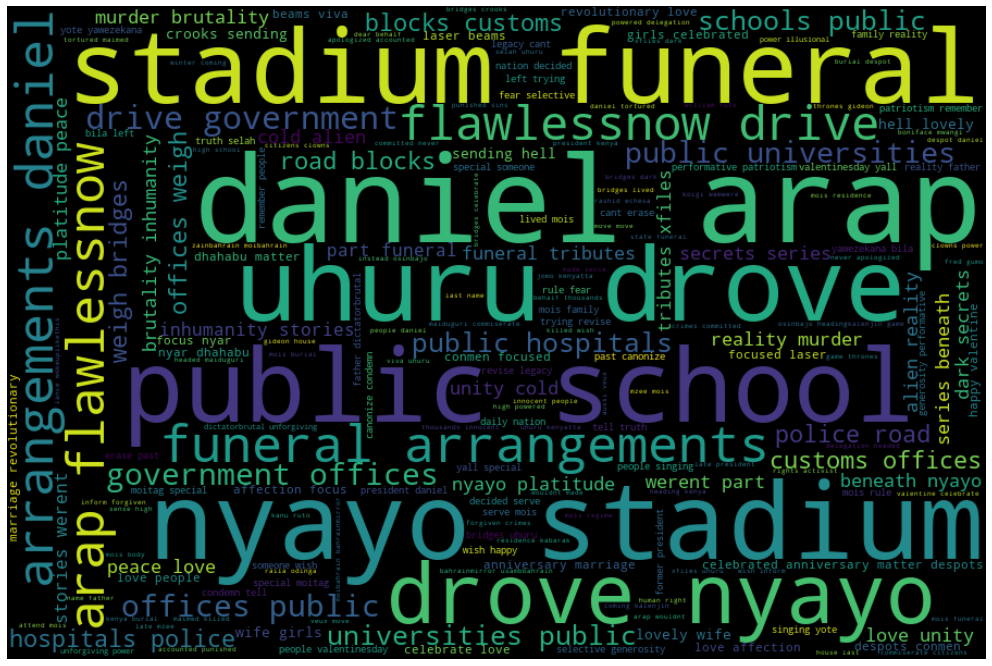

In [79]:
all_words = ' '.join([text for text in moi['tidy_tweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=900, height=600, random_state=2020, max_font_size=110).generate(all_words)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()